Compute unstructured hierarchical clustering...
Elapsed time: 0.11s
Number of points: 1500


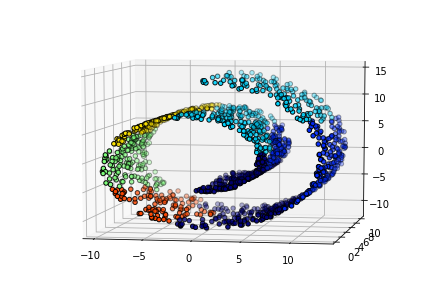

In [ ]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

# #############################################################################
# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= .5

# #############################################################################
# Compute clustering
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')

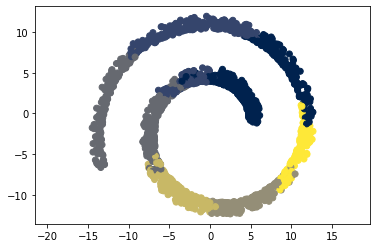

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='euclidean', random_state=1)
out = model.fit_transform(X)
plt.scatter(out[:, 0], out[:, 1], c=label,cmap='cividis')
plt.axis('equal');

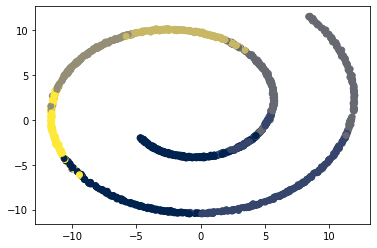

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_out = pca.fit_transform(X)
plt.scatter(pca_out[:,0],pca_out[:,1],c=label,cmap='cividis')

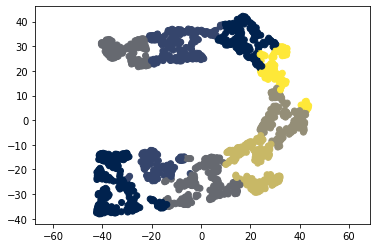

In [ ]:
from sklearn.manifold import TSNE
model = TSNE( n_components=2,perplexity=30)
out = model.fit_transform(X)
plt.scatter(out[:, 0], out[:, 1], c=label,cmap='cividis')
plt.axis('equal');